## Import dataset

In [1]:
import pandas as pd
data = pd.read_csv(r"C:\Users\Mahesh\Desktop\data science\Asssignment\Simple Linear Regression\delivery_time (1).csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


## EDA

In [4]:
!pip install pandas_profiling
!pip install sweetviz

In [5]:
#load the libraries
import pandas as pd
import numpy as np
import pandas_profiling as pp
import sweetviz as sv

In [6]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [7]:
data.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [8]:
#Data Structure 
type(data)
data.shape

(21, 2)

In [9]:
#data types
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

### Duplicates

In [10]:
#Count of duplicated rows
data[data.duplicated()].shape

(0, 2)

### Rename the columns

In [13]:
data = data.rename({'Delivery Time': 'DeliveryTime'}, axis=1)
data = data.rename({'Sorting Time': 'SortingTime'}, axis=1)


## Outlier Detection

<AxesSubplot:>

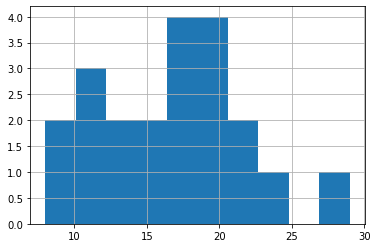

In [14]:
# histogram of Delivery Time
data['DeliveryTime'].hist()

<AxesSubplot:>

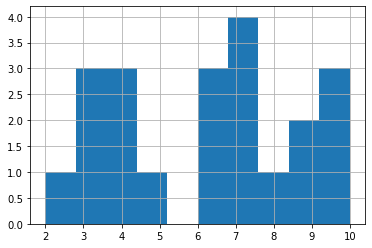

In [15]:
# histogram of Sorting Time
data['SortingTime'].hist()

<AxesSubplot:>

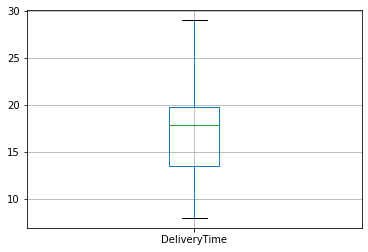

In [16]:
#Box plot
data.boxplot(column=['DeliveryTime'])

<AxesSubplot:>

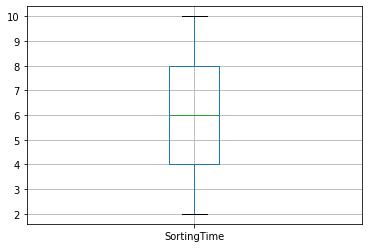

In [17]:
#Box plot
data.boxplot(column=['SortingTime'])

In [18]:
#Descriptive stat
data['DeliveryTime'].describe()

count    21.000000
mean     16.790952
std       5.074901
min       8.000000
25%      13.500000
50%      17.830000
75%      19.750000
max      29.000000
Name: DeliveryTime, dtype: float64

In [19]:
data['SortingTime'].describe()

count    21.000000
mean      6.190476
std       2.542028
min       2.000000
25%       4.000000
50%       6.000000
75%       8.000000
max      10.000000
Name: SortingTime, dtype: float64

## Scatter plot and Correlation analysis

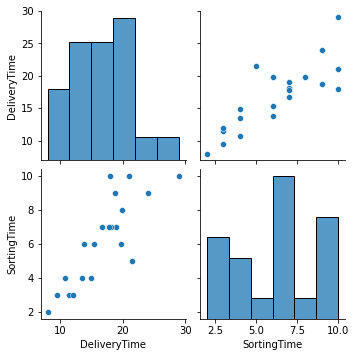

In [20]:
import seaborn as sns
sns.pairplot(data)


In [21]:
data.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


C:\Users\Mahesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DeliveryTime', ylabel='Density'>

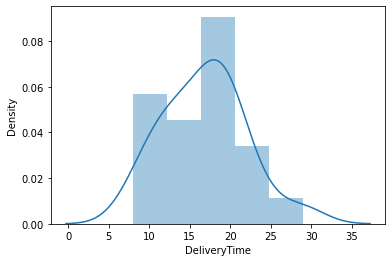

In [23]:
import seaborn as sns
sns.distplot(data['DeliveryTime'])

C:\Users\Mahesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SortingTime', ylabel='Density'>

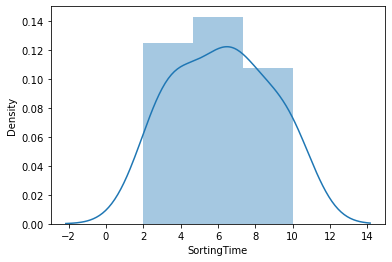

In [24]:
import seaborn as sns
sns.distplot(data['SortingTime'])

## Fitting Simple Linear Regression Model

In [25]:
import statsmodels.formula.api as smf 
model = smf.ols("DeliveryTime~SortingTime",data=data).fit()

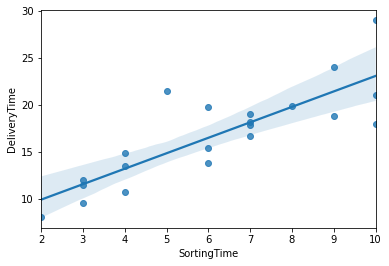

In [26]:
sns.regplot(x="SortingTime", y="DeliveryTime", data=data);


In [27]:
#Coefficients
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [28]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)   

Intercept      3.823349
SortingTime    6.387447
dtype: float64 
 Intercept      0.001147
SortingTime    0.000004
dtype: float64


In [29]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

## Predict for new data point

In [30]:
newdata=pd.Series([13,15])

In [32]:
data_pred=pd.DataFrame(newdata,columns=['SortingTime'])

In [33]:
model.predict(data_pred)

0    28.019993
1    31.318032
dtype: float64